# Classification Predict Team ZF_1

© Explore Data Science Academy
### Team Members
* Bodine Mazibuko b.n.mazibuko9@gmail.com
* Kennedy Ombedho kencarsonbonyo@gmail.com
* Adetunji Emmanuel adegbem@gmail.com
* Clara Ogechi Raphael c.raphael@agnosyshealth.com
* Rotimi Oluwabusola oluwabusolaseyi@gmail.com

---
### Honour Code

WE **Team ZF 1**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

&ensp;
   ### Predict Overview: Climate Change Believe Analysis
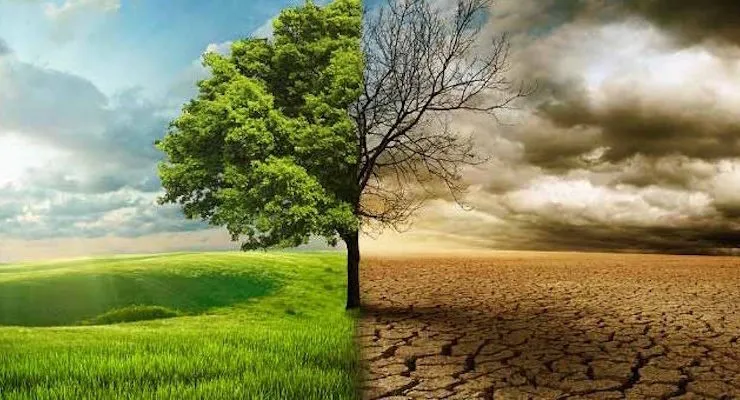





As there is an uptrend in awareness on climate change and the accompany bad effects, many people and companies alikes are working to reduce there environmental impact or carbon footprint.

* In this effect company ABC Inc as hired our team `ZF1` to look into how there customer and potential customers percive this subject (climate change). There goal being to align there company values with customers perspective, so as to ultimately not lose there customer base while trying to reduce the company carbon footprit.

* The Team ZF1 will used the data provided by the company to gain insight into the dynamics of the tweets, what are the majority sentiments, keywords associated with this sentiments and what are the `popular topics, subjects, personality` surrounding climate change.
* We will futher use Machine Learning model to classify whether or not a person believes in climate change, based on their novel tweet data.

By providing this informations abovem we will be able to give the company access to what their customers and potential one's orientation to climate change, and thus increasing the marketing team insights and having better future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Cleaning</a>

<a href=#five>5. Engineering Features</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. References</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [1]:
#importing comet for commiting notebook work and model
from comet_ml import Experiment

In [2]:
# Setting the API key (saved as environment variable)
#initialize experiment for Comet
experiment = Experiment(
    api_key="mn7gOjsbMtlJODxIBDP2G0w6e",
    project_name="edsa-climate-change-belief-analysis",
    workspace="roceey",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/adegbem/general/246b3034589e4826a8a3db9f6dc744f3



The above cell is use to commit our model to `comet` after every run of our notebook

In [3]:
# importing basic and fundamental libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import pickle
import pycountry

from wordcloud import WordCloud

# libraries for NLP
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

# importing libraries for utility from sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

# importing libraries for modelling form sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# libraries to check model metrics from sklearn
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Enable interactive visualisations in Jupyter
from ipywidgets import interact, interact_manual, widgets
import plotly.express as px

# Suppressing unnwarranted warnings
import warnings
warnings.filterwarnings("ignore")

This are the basic libraries we will be using in the notebook for the project at hand 

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [4]:
# Importing train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

# displaying a few rows of both dataset
display(train_df.head())
display(test_df.head())


sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

Loading of the dataset (using pandas) that will be used throught the project, which include;
- The train dataset which have a label column describing the sentiment of each tweet and 
- A test dataset which has no sentiment label and will be use to test our model predict power

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset contains three features
- the dataset consist of `15819` rows
- there seems to be no null values


&ensp;

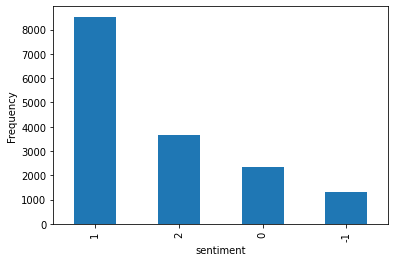

In [6]:
train_df.sentiment.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('sentiment');

Most tweets support the man-made climate change which is represented by `1` while we have a fewer anti-climate change tweets


&emsp;

In [7]:
# creating a sentiment_map
sentiment_dict = {'Anti-Climate':-1, 'Neutral':0, 'Pro-Climate':1, 'News-Fact':2}

&emsp;
### Hashtag and mention frequency per sentiment - Emmanuel


&emsp;

In [8]:
def tag_extractor(tweet, type_word: str):
    """ The function extract a pattern from a string of words"""
    pattern = r'{}\w+'.format(type_word)
    result = ' '.join(re.findall(pattern, tweet))
    return result

# Implimentation of the function above
train_df['hash_tag'] = train_df.message.apply(tag_extractor, args='#')
train_df['mentions'] = train_df.message.apply(tag_extractor, args='@')

The function is to extract mentions or hashtag in the tweet

In [9]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared"""
    words = words.split()
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict


The function is use to store frequency of words using the dictionary data structure

In [10]:
def sentiment_word_extract(sentiment_cat, coln_name, iter_hash_num):
    """This use to compile all the word and there frequency 
    in the individual category found in a particular column"""
    count = 0
    result = {}
    type_labels = train_df.sentiment.unique()
    sentiments = {}
    df_grp = train_df.groupby('sentiment')
    for pp in type_labels:
        sentiments[pp] = {}
        for row in df_grp.get_group(pp)[coln_name]:
            sentiments[pp] = bag_of_words_count(row, sentiments[pp])
    for w in sorted(sentiments[sentiment_cat], key=sentiments[sentiment_cat].get, reverse=True):
        count += 1
        result[w] = sentiments[sentiment_cat][w]
        if count == iter_hash_num:
            break
    return result


The function is to group the tweet by sentiment and extract each word in the tweet with there corresponding frequency with the aid of the `bag_of_words_count` function created earlier

In [11]:
def word_visual(sentiment_cat, coln_name, iter_hash_num):
    """This function is used to creat two visuals a pie chart and a word could base on the frequency """
    output = sentiment_word_extract(sentiment_cat, coln_name, iter_hash_num)
    df = pd.DataFrame({
                    'Frequency': output.values(),
                    'Hash-Tag': output.keys()})

    fig, ax = plt.subplots(1,2, figsize=(15, 7))
    sns.barplot(data=df, y='Frequency', x='Hash-Tag', ax=ax[0])
    wordcloud = WordCloud(background_color = 'white',
                          width = 512,
                          height = 384).generate(' '.join(output.keys()))
    ax[1].imshow(wordcloud)
    xlabels = df['Hash-Tag']
    ax[0].tick_params(axis='x', labelrotation=75)
    ax[1].axis("off")
    fig.tight_layout()
    plt.show()


The function is use to plot viusals (`piechart and wordcloud`) for the different sentiments

In [12]:
def iplotting(type_word: dict={'Hash Tags':'hash_tag', 'Mentions':'mentions'}):   
    slider = widgets.IntSlider(value=10, min=1, max=20, step=1)
    @interact_manual
    def selecting(Frequency=slider, type_select=type_word.keys(), sentiment=sentiment_dict.keys()):
#         train_df['hash_tag'] = train_df.message.apply(tag_extractor, args=type_word[type_select])
        vis = word_visual(sentiment_dict[sentiment], type_word[type_select], iter_hash_num=Frequency)
iplotting()


interactive(children=(IntSlider(value=10, description='Frequency', max=20, min=1), Dropdown(description='type_…

### Hash-Tags
* The name `Trump` appear in all sentiments and this obivous because he was the president of united state of america (USA) at the time of the tweet data collection and this shows that the `President` of `USA` matters in the topic surrounding climate change
    * `Maga` is another word which also means `Make America Great Again` which also a pointer that america and americans are more involved in the talk about climate change<br><br>
* `ParisAgreement/ParisAccord` also known as `COPP 22` is another `hot` hash-tag since it plays a major role in addressing climate change; _The Paris Agreement is a legally binding international treaty on climate change. It was adopted by 196 Parties at COP 21 in Paris, on 12 December 2015_<br><br>
* Obivous word that are also popular in all the sentiments tweets are `climatechange`, `climate`<br><br>
* A stand out `hash-tag` is `QandA`, this perculiar to the `neutral and anti-climate` tweet, this shows that though they may not support the believe of climate change, most are curious in learning more about the subject<br><br>
* **Anti-Climate tweets:** We have hash-tags such as `fakenews and ClimateScam` depicting there unbelieve<br><br>
* **Neutral tweets:** Are filled with hash-tags (such as `ApriFoolsDay, 4corners, GameofThrones, and amReading`) that are not related to climate change, confirming that the user are less concern about the subject matter<br><br>
* **Pro-Climate tweets:** We have so many hash-tags that shows this particular set of tweet speak and concerned about the climate change such as; `ClimateCount, Envirnoment, IamVotingBecause, globalwarming e.t.c.`. All this shows that a tweet support the subject `Climate-change`<br><br>
* **News fact tweets:** Hash-Tag `China` stood out in the `news` type of tweet and this depict there are more reportings about china and it contribution (postive or negatively) to climate change
    * Other popular tag associated with this type of tweets are `news, science and CNN` all this afirm that this tweet are more about fact about climate change 

### Mentions
Note: All the sentiment in the mention anaylsis shows great similarities except for `News-Fact`<br><br>
* As we have in the hash-tags the name `Trump` appears in all the sentiments types except for `News-Fact sentiments`<br><br>
* Other mentions are mostly important people in america, such as `KamalaHarris`, United state sentators (`SenSanders, <br><br>SenatorMRoberts e.t.c`), this further show those people/country leading the talk about `climate change`<br><br>
* **News fact tweets:** Since it not really a sentiment but facts about climate change, it mentions are mostly `TV` stations `blogs` `newspapers` and `websites`
    * This mentions are `CNN`, `Reuters`, `nytimes`, `guardian`, `washingtonpost` e.t.c<br><br>

&emsp;
### Emoji frequency per sentiment - Ken


&emsp;

&emsp;
### Frequency of countries that are pro climate change (sentiment 1) - Seyi


&emsp;

&emsp;
### Frequency of countries that are pro climate change (sentiment 1) - Bodine


&emsp;

In [13]:
country_list = []
for country in pycountry.countries:
    country_list.append(country.name)

In [14]:
country_list = list(map(lambda x: x.lower(),country_list))

In [15]:
def cleaning_country(tweet):
    rem_punct = re.sub(r'[^a-zA-Z ]', '', tweet)
    word_split = rem_punct.lower().split()
    country_set = set(country_list)
    country_ext = ' '.join([t for t in word_split if t in country_set])
    return country_ext

# Implementation of the tweet above
train_df['country'] = train_df.message.apply(cleaning_country)


In [16]:
def country_plot(sentiment: dict):   
    slider = widgets.IntSlider(value=10, min=1, max=20, step=1)
    @interact_manual
    def selecting(Frequency=slider, sentiment=sentiment_dict.keys()):
        country_sentiment = train_df['country'][train_df['sentiment'] == sentiment_dict[sentiment]]
        df = country_sentiment.value_counts().to_frame().iloc[1:Frequency]
        fig = px.bar(df, x=df.index, y='country', labels={'index':'Country', 'country': 'Count'})
        fig.show()
        
# calling the function above to plot our visual
country_plot(sentiment_dict)

interactive(children=(IntSlider(value=10, description='Frequency', max=20, min=1), Dropdown(description='senti…

In [17]:
# train_df['S1_country'] = train_df['cleaned_tweet'][train_df['sentiment'] == 1]
# train_df['S1_country'] = train_df['country'][train_df['sentiment'] == 1]
# train_df.S1_country.value_counts().iloc[1:11].plot(kind='bar')
# plt.xlabel("countries")
# plt.ylabel("count")
# plt.show()

### Dealing with data imbalance 


&emsp;

dual-sampling:


sentiment                                            message  tweetid  \
12408          2  RT @NYTScience: Donald Trump could put climate...   981034   
14759          2  �� Most Americans want 'aggressive' action on ...   650502   
9048           0  Gotta be a cause of global warming though http...   572092   
6289           0  And here come all the global warming jokes.......   273715   
4791           2  RT @altusda: Recent research suggests climate ...   830534   

                  hash_tag     mentions country  
12408                       @NYTScience          
14759                                            
9048                                             
6289                                             
4791   #science #climatech     @altusda

Class with there new resampled sizes
 1    4000
 2    4000
 0    4000
-1    4000
Name: sentiment, dtype: int64


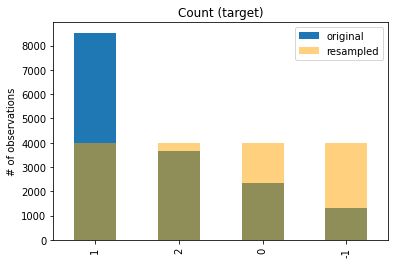

In [18]:
class_size = 4000 # setting an average or fixed size for each category in 'sentiment'
dd = train_df.sentiment.value_counts() # getting category name and their size
appended_data = [] # creating an empty list to append all category after resampling

# Creating a for-loop to resample and append to a list
for index, size in dd.items():
    if size < class_size: # setting condition to check if to downsampling or otherwise
        temp_pd = resample(train_df[train_df['sentiment']==index],
                          replace=True, # sample with replacement
                          n_samples=class_size, # match number in majority class
                          random_state=27)
    else:
        temp_pd = resample(train_df[train_df['sentiment']==index],
                          replace=False, # sample with replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in minority class
                          random_state=27)
# Appending each category after resampling
    appended_data.append(temp_pd)

# Creating a new dataframe and viewing
df_train_sampled = pd.concat(appended_data, axis=0)
print('dual-sampling:')
display(df_train_sampled.sample(5))
print('Class with there new resampled sizes')
print(df_train_sampled.sentiment.value_counts())

# ploting the old and new graph frequency
ax = train_df.sentiment.value_counts().plot(kind='bar')
df_train_sampled.sentiment.value_counts().plot(kind='bar', title='Count (target)', 
                                               ax=ax,color='orange', alpha=0.5);
plt.xticks(range(len(dd)),dd.index)
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

<a id="four"></a>
## 4. Data cleaning and Wrangling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Creating a function to clean the `message`


&emsp;

In [19]:
# creating a function to stem each words
stemmer = SnowballStemmer('english')

# creating a function to lemmatize each words
lemmatizer = WordNetLemmatizer()


In [20]:
# creating a function to clean the dataset
def cleaning(tweet):
    
    """The function uses patterns with regular expression, 'stopwords' 
        from natural language processing (nltk) and  tokenize using split method
        to filter and clean each tweet message in a dataset"""
    
    pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    rem_link = re.sub(pattern, '', tweet) 
    rem_punct = re.sub(r'[^a-zA-Z ]', '', rem_link) 
    rem_punct = re.sub(r'RT', '', rem_punct) 
    word_split = rem_punct.lower().split()
    stops = set(stopwords.words("english"))
    without_stop_sent = ' '.join([t for t in word_split if t not in stops]) 
    return without_stop_sent


In [21]:
# creating new features using stemming
# creating a function that stem using 'stemmer' object earlier
def stemmer_fn(words, stemmer):
    
    """ The function implement the stemmer function from 'nltk' to have a cleaner tweet message"""
    
    word_split = set(words.split())
    return ' '.join([stemmer.stem(word) for word in word_split])


In [22]:
# creating new features using stemming
# creating a function that lemmatize using 'lemmatizer' object created earlier
def lemmatizer_fn(words, lemmatizer):
    
    """ The function implement the lemmatizer function from 'nltk' to have a cleaner tweet message"""
    
    word_split = set(words.split())
    return ' '.join([lemmatizer.lemmatize(word) for word in word_split])


##### Creating variant of `tweet message`

In [23]:
# applying the function to 'message' in the dataset
train_df['cleaned_tweet'] = train_df.message.apply(cleaning)

# applying the function to 'cleaned_tweet' in the dataset
train_df['stem_tweet'] = train_df.cleaned_tweet.apply(stemmer_fn, args=(stemmer, ))

# applying the function to 'cleaned_tweet' in the dataset
train_df['lemma_tweet'] = train_df['cleaned_tweet'].apply(lemmatizer_fn, args=(lemmatizer, ))


This actually create a `new column` that is `cleaned, stemed and lemmatized` from our **tweet/message** in the dataset
* This wwill give us flexible option to choose which type of `processed tweet` we want to use for training our model

In [24]:
# viewing the final dataframe with the cleaned, stemmed and lemmatized tweets
train_df.sample(10)

sentiment                                            message  tweetid  \
13846          1  RT @ThysNoisia: ������ Big picture reminder: c...   569200   
4565           0  RT @BecketAdams: Wait Ã¢â‚¬Â¦ youÃ¢â‚¬â„¢re tu...   165366   
15585          1  RT @savmontano: Our president doesn't believe ...   471206   
11386          1  RT @savitriyaca: a must watch, cause climate c...   891447   
15813          1  RT @thinkprogress: EPA head falsely claims car...   442853   
6980           1  RT @retroJACE: global warming real as hell. al...   125623   
7305           1  @dandrezner @washingtonpost the dude has done ...   424138   
15601          0      RT @NicktheRuler__: @ZeeNation global warming     8976   
5026           2  NATO agrees with the Pentagon: climate change ...   953208   
9155           2  RT @washingtonpost: Top download from any fede...   396837   

      hash_tag                     mentions country  \
13846                           @ThysNoisia           
4565                           @BecketAdams           
15585                           @savmontano           
11386                          @savitriyaca           
15813                        @thinkprogress           
6980                             @retroJACE           
7305            @dandrezner @washingtonpost           
15601            @NicktheRuler__ @ZeeNation           
5026                                                  
9155                        @washingtonpost           

                                           cleaned_tweet  \
13846  thysnoisia big picture reminder climate change...   
4565   becketadams wait youre turning lights honor cl...   
15585  savmontano president doesnt believe global war...   
11386  savitriyaca must watch cause climate change fl...   
15813  thinkprogress epa head falsely claims carbon e...   
6980   retrojace global warming real hell al gore tol...   
7305   dandrezner washingtonpost dude done undermine ...   
15601              nicktheruler zeenation global warming   
5026   nato agrees pentagon climate change threat mul...   
9155   washingtonpost top download federal site right...   

                                              stem_tweet  \
13846  remind climat weapon amp pictur big chang th n...   
4565   turn climat light chang becketadam honor agree...   
15585  global believ warm savmontano doom doesnt rega...   
11386  movi climat nation caus savitriyaca must watch...   
15813  global emiss fals warm head thinkprogress carb...   
6980   degre real global warm told hell al retrojac u...   
7305   climat much anyon dude done effort jail chang ...   
15601                      zeenat global warm nicktherul   
5026     pentagon multipli climat agre threat chang nato   
9155   climat report top right chang site feder servi...   

                                             lemma_tweet  
13846  reminder climate weapon amp picture big change...  
4565   turning climate light change becketadams honor...  
15585  global believe warming savmontano doomed doesn...  
11386  movie climate national cause savitriyaca must ...  
15813  global emission falsely warming head thinkprog...  
6980   degree real global warming told hell al retroj...  
7305   climate much anyone dude done effort jail chan...  
15601              zeenation global warming nicktheruler  
5026   pentagon multiplier climate agrees threat chan...  
9155   climate report top right change site federal s...

<a id="five"></a>
## 5. Engineering Features
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [25]:
# converting each word in the dataset into features
vectorizer = CountVectorizer(analyzer = "word", max_features = 8000) # setting the maximum feature to 8000 

we set the maximum feature to random number 8000 by discretion and to have a faster training of our model<br><br>

In [26]:
# fitting the vectorizer object to the suitable column in the dataset
reviews_vect = vectorizer.fit_transform(train_df['cleaned_tweet'])

# converting the features to numpy array for fast fitting of our dataset
train_data_features = reviews_vect.toarray()

# checking the shape to be sure of the size of the features
print(f'Our new vectorized features have {train_data_features.shape[0]} rows and {train_data_features.shape[1]} feaures')

Our new vectorized features have 15819 rows and 8000 feaures


Converting words in the dataset into features using the `CountVectorizer` from sklearn
- we further convert the vectorize dataset into `array` for fast training of our model

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [27]:
# setting the target and features 
y = np.array(train_df['sentiment'])
X = train_data_features

# split the target ad features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Splitting of the dataset into train and test dataset, so that we can train and also see the performance of the model on unseen dataset

In [28]:
# Creating a function to fit the model and calculate various metrics
def modelling(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    """The function implements a machine learning model, using the train_test_split concept and 
        calculate various metrics, using it to check for underfitting or overfitting and most 
        importantly the performance of the model been executed"""
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_test)
    
# calculating the metrics
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred_valid,  average='weighted')
    cm = confusion_matrix(y_test, pred_valid)
    cr = classification_report(y_test, pred_valid, target_names=sentiment_dict, output_dict=True)
    
# creating a dataframe for 'confusion matrix' and 'classification report'
    cm_df = pd.DataFrame(cm, index = sentiment_dict, columns = sentiment_dict)
    cr_df = pd.DataFrame(cr)
    
    print('Confusion Matrix')
    display(cm_df)
    print('Classification Report')
    display(cr_df)
    
# Plotting the confusion matrix using heatmap
    plt.figure(figsize=(10,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print(f'Train accuracy(f1) is: {round(f1_train, 3)} and Validation accuracy(f1) is {round(f1_test, 3)}')
    return cm_df, cr_df, cm # returning metrics


&emsp;
### Logistic Classifier


&emsp;

Confusion Matrix


Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate           124       33           99         23
Neutral                 16      229          180         39
Pro-Climate             15      101         1441        134
News-Fact                6       27          160        537

Classification Report


Anti-Climate     Neutral  Pro-Climate   News-Fact  accuracy  \
precision      0.770186    0.587179     0.766489    0.732606  0.736726   
recall         0.444444    0.493534     0.852158    0.735616  0.736726   
f1-score       0.563636    0.536300     0.807057    0.734108  0.736726   
support      279.000000  464.000000  1691.000000  730.000000  0.736726   

             macro avg  weighted avg  
precision     0.714115      0.732702  
recall        0.631438      0.736726  
f1-score      0.660275      0.729055  
support    3164.000000   3164.000000

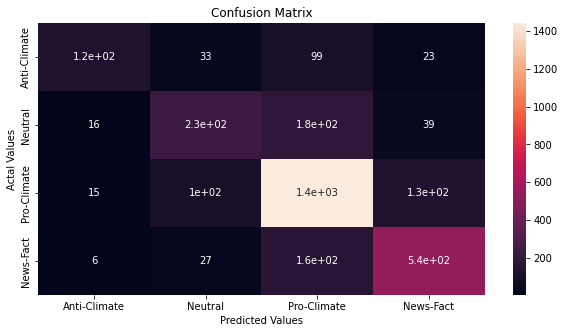

Train accuracy(f1) is: 0.937 and Validation accuracy(f1) is 0.729


In [29]:
# create logistic regression model instance
lm = LogisticRegression(C=2, solver='liblinear')

# fitting and predictiion by calling the 'modelling' fuction 
cm_df_logit, cr_df_logit, cm_logit = modelling(lm)

From the confusion matrix we can see that the model is unbalance while predicting, having more correctly predicted `Pro-CLimate` sentiment than others have accuracy of `81%`
* Generally the model is overfitting having an accuracy score of `94%` in training vs `73%` while predicting unseen dataset


In [30]:
# Create dictionaries for the data we want to log

params = {"random_state": 10,
          "model_type": "lm"
          }
metrics = {"f1": cr_df_logit.loc['f1-score', 'weighted avg'],
           "precision": cr_df_logit.loc['precision', 'weighted avg'],
           "recall": cr_df_logit.loc['recall', 'weighted avg']
           }

In [31]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm_logit)

{'web': 'https://www.comet.ml/api/asset/download?assetId=f913536d0b77416ba926cdc2cc7a8d21&experimentKey=246b3034589e4826a8a3db9f6dc744f3',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=f913536d0b77416ba926cdc2cc7a8d21&experimentKey=246b3034589e4826a8a3db9f6dc744f3',
 'assetId': 'f913536d0b77416ba926cdc2cc7a8d21'}

The above cells are used to log/commit our model to comet 

&emsp;
### Decision Tree - Seyi


&emsp;

&emsp;
### Neural Network Classifier - Ken


&emsp;

&emsp;
### SVM - Bodine


&emsp;

In [32]:
svc = SVC(kernel='linear')

# fitting and predictiion by calling the 'modelling' fuction 
cm_df, cr_df, cm = modelling(svc)

# loging the confusion matric to comet
experiment.log_confusion_matrix(matrix=cm)

&emsp;
### Naive Bayes - Emmanuel


&emsp;

In [33]:
# split the target ad features into train and test
X_train, X_test, y_train, y_test = train_test_split(train_df['cleaned_tweet'], train_df.sentiment, test_size=0.2, random_state=10)

spliting our `features` before vectorizing

##### Building a pipeline to be more concise

In [34]:
# pipline with naive_bayes and using the 'clean_tweet' from dataset to fit the model
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),])
# cross validation
scores = cross_validate(text_clf, train_df['cleaned_tweet'], train_df.sentiment, return_train_score=True)
pd.DataFrame(scores)

fit_time  score_time  test_score  train_score
0  0.446525    0.069804    0.711441     0.868194
1  0.396537    0.082391    0.711125     0.865903
2  0.387809    0.069593    0.715234     0.865429
3  0.369648    0.074427    0.716498     0.863690
4  0.383170    0.069523    0.709137     0.864017

The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [35]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
              'clf__alpha': (1e-2, 1e-3),
             'clf__fit_prior': (True, False)}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
display('The best accuracy is:',gs_clf.best_score_)
display(gs_clf.best_params_)

# predictions
predicts = gs_clf.predict(X_test)
cm = confusion_matrix(y_test,  predicts)
pd.DataFrame(cm, index = sentiment_dict, columns = sentiment_dict)

'The best accuracy is:'

0.6990122481232715

{'clf__alpha': 0.01, 'clf__fit_prior': True, 'vect__ngram_range': (1, 2)}

Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate           126       45           93         15
Neutral                 46      198          181         39
Pro-Climate             48      120         1351        172
News-Fact               13       18          149        550

Using our split dataset so we can train on seen data and validate our model with the unseen dataset

In [36]:
# Saving the trained model as a pickle file
Pkl_Filename = "naive_bayes_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gs_clf, file)

In [37]:
# Create dictionaries for the data we want to log
params = gs_clf.best_params_
metrics = {"f1": gs_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

{'web': 'https://www.comet.ml/api/asset/download?assetId=dd2f9f95363b4460ab10103570a518b5&experimentKey=246b3034589e4826a8a3db9f6dc744f3',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=dd2f9f95363b4460ab10103570a518b5&experimentKey=246b3034589e4826a8a3db9f6dc744f3',
 'assetId': 'dd2f9f95363b4460ab10103570a518b5'}

The above cells are used to log/commit our model to comet 

&emsp;
### KNeighborsClassifier - Emmanuel


&emsp;

Building a pipeline to be more concise

In [38]:
# pipline with naive_bayes and using the 'clean_tweet' from dataset to fit the model
knc_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', KNeighborsClassifier()),])
# cross validation
scores = cross_validate(knc_clf, train_df['cleaned_tweet'], train_df.sentiment, return_train_score=True)
pd.DataFrame(scores)

fit_time  score_time  test_score  train_score
0  0.429806    2.591188    0.493047     0.684394
1  0.376471    2.628177    0.570796     0.663532
2  0.379236    2.556738    0.456384     0.665824
3  0.399096    2.374605    0.475348     0.669301
4  0.398180    2.348574    0.550111     0.655341

The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [39]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__n_neighbors': (1, 31)}
gs_knc = GridSearchCV(knc_clf, parameters, n_jobs=-1)
gs_knc = gs_knc.fit(X_train, y_train)
display(f'The best accuracy is: {gs_knc.best_score_}')
display(gs_knc.best_params_)

# predictions
predicts = gs_clf.predict(X_test)
cm = confusion_matrix(y_test,  predicts)
pd.DataFrame(cm, index = sentiment_dict, columns = sentiment_dict)

'The best accuracy is: 0.5755037534571316'

{'clf__n_neighbors': 1, 'vect__ngram_range': (1, 1)}

Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate           126       45           93         15
Neutral                 46      198          181         39
Pro-Climate             48      120         1351        172
News-Fact               13       18          149        550

In [40]:
# Saving the trained model as a pickle file
Pkl_Filename = "KNeighborsC_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gs_knc, file)

In [41]:
# Create dictionaries for the data we want to log

params = gs_knc.best_params_
metrics = {"f1": gs_knc.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

{'web': 'https://www.comet.ml/api/asset/download?assetId=c139a27caa6542888c9889bf94566e82&experimentKey=246b3034589e4826a8a3db9f6dc744f3',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=c139a27caa6542888c9889bf94566e82&experimentKey=246b3034589e4826a8a3db9f6dc744f3',
 'assetId': 'c139a27caa6542888c9889bf94566e82'}

The above cells are used to log/commit our model to comet 

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Cleaning the test dataset

&emsp;

In [42]:
# applying the functions from earlier to clean our 'test' dataset
test_df['cleaned_tweet'] = test_df.message.apply(cleaning)
test_df['lemma_tweet'] = test_df['cleaned_tweet'].apply(lemmatizer_fn, args=(lemmatizer, ))
test_df['stem_tweet'] = test_df.cleaned_tweet.apply(stemmer_fn, args=(stemmer, ))

In [43]:
#  Double checking our dataframe was modified rightly
test_df.sample(5)

message  tweetid  \
4915  RT @helenzaltzman: TM: 'We'll bond over our di...   698764   
3385  RT @nytimesbusiness: Trump questions the scien...   973737   
4699  RT @UWE_GEM: Talk on 15 June - Society vs the ...   943350   
5317  We gonna die from global warming https://t.co/...   837179   
5755  RT @billybragg: Do those who won't vote Lab be...   112460   

                                          cleaned_tweet  \
4915  helenzaltzman tm well bond dismissal climate c...   
3385  nytimesbusiness trump questions science behind...   
4699  uwegem talk june society vs individual focus a...   
5317                           gonna die global warming   
5755  billybragg wont vote lab corbyns views nukes s...   

                                            lemma_tweet  \
4915  real dismissal climate shes helenzaltzman well...   
3385  tack question science climate take nytimesbusi...   
4699  uwegem ticket individual climate v amp book ju...   
5317                           die global warming gonna   
5755  wont climate lab threat billybragg nuke change...   

                                             stem_tweet  
4915  real dismiss climat shes helenzaltzman well tm...  
3385  tack question scienc climat take nytimesbusi h...  
4699  uwegem ticket individu climat vs amp book june...  
5317                              die global warm gonna  
5755  wont climat lab threat billybragg nuke chang v...

In [44]:
# Converting the word of the all tweet into features using 'vectorizer' object created earlier
reviews_vect_test = vectorizer.transform(test_df['lemma_tweet'])

In [45]:
# converting into a numpy array
test_data_features = reviews_vect_test.toarray() # for fast fitting of our dataset
test_data_features.shape # checking to be sure is the same size with our 'train' dataset

(10546, 8000)

In [46]:
# Using the fitted (train) model to predict the 'test' dataset
pred_test = lm.predict(test_data_features)

In [47]:
# Saving test predictions to csv file
output = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': pred_test})
output.to_csv('submission.csv', index=False)

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="nine"></a>
## 9. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

1. Image 1 : https://businessday.ng/columnist/article/climate-change-time-for-actions/

In [48]:
# ending the comet logging 
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/adegbem/general/246b3034589e4826a8a3db9f6dc744f3
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1 [3]    : (0.5755037534571316, 0.729054868131763)
COMET INFO:     precision : 0.7327019478753439
COMET INFO:     recall    : 0.7367256637168141
COMET INFO:   Parameters:
COMET INFO:     C                              : 2
COMET INFO:     algorithm                      : auto
COMET INFO:     alpha                          : 0.01
COMET INFO:     class_prior                    : 1
COMET INFO:     class_weight                   : 1
COMET INFO:     clf                            : KNeighborsClassifier(n_neighbors=1)
COMET INFO:     clf__algorithm                 : auto
COMET INFO:     clf__alpha                     : 0.01
COMET INFO:     clf__cla

COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET ERROR: Error sending a notification, make sure you have opted-in for notifications
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
